In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
#создание таблицы и чтение из файла
df = pd.read_csv('C:\\autos.csv', encoding  = 'latin1')
#вывод первых пяти записей
df.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
#открываем первые 15 и последние 15 строк, для оценки информативности столбцв.
pd.options.display.max_rows = 30
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
print(df.shape)
print("размер данных до удаления столбцов")
del df['dateCrawled'] # удаляем столбцы
del df['lastSeen']
del df['nrOfPictures']
del df['dateCreated']
del df['seller']
del df['offerType']
df = df.dropna()
df = df.drop_duplicates()
df = df.drop(df[df.monthOfRegistration == 0].index)
df = df.drop(df[df.postalCode == 0].index)
df = df.reset_index()
del df['index']

print(df.shape)
print("размер данных после удаления столбцов")

(371528, 20)
размер данных до удаления столбцов
(250072, 14)
размер данных после удаления столбцов


In [5]:
qua = df.quantile([.25,.5,.75])

df = df.drop(df[df.price < qua['price'][0.25]].index)
# удаление элементов где цена меньше нижнего квартиля

df = df.drop(df[df.price > qua['price'][0.75]].index)
# удаление элементов где цена больше верхнего квартиля

df = df.drop(df[df.yearOfRegistration < qua['yearOfRegistration'][0.25]].index)
# удаление элементов где год регистрации меньше нижнего квартиля

df = df.drop(df[df.yearOfRegistration > qua['yearOfRegistration'][0.75]].index)
# удаление элементов где год регистрации больше верхнего квартиля

df = df.drop(df[df.powerPS < qua['powerPS'][0.25]].index)
# удаление элементов где мощность двигателя меньше нижнего квартиля

df = df.drop(df[df.powerPS > qua['powerPS'][0.75]].index)
# удаление элементов где мощность двигателя больше верхнего квартиля

df = df.reset_index()
del df['index']
print(df.shape)

(54317, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54317 entries, 0 to 54316
Data columns (total 14 columns):
name                   54317 non-null object
price                  54317 non-null int64
abtest                 54317 non-null object
vehicleType            54317 non-null object
yearOfRegistration     54317 non-null int64
gearbox                54317 non-null object
powerPS                54317 non-null int64
model                  54317 non-null object
kilometer              54317 non-null int64
monthOfRegistration    54317 non-null int64
fuelType               54317 non-null object
brand                  54317 non-null object
notRepairedDamage      54317 non-null object
postalCode             54317 non-null int64
dtypes: int64(6), object(8)
memory usage: 5.8+ MB


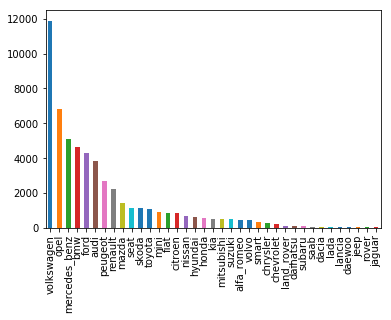

In [7]:
#гистограмма автомобилей по маркам
df['brand'].value_counts().plot(kind='bar')

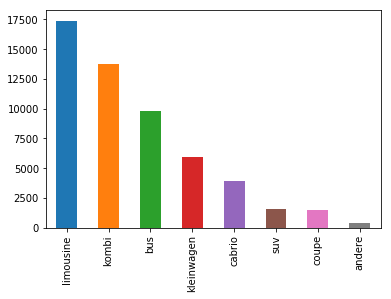

In [8]:
#гистограмма по типам кузова
df['vehicleType'].value_counts().plot(kind='bar')

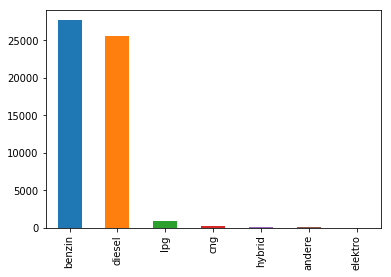

In [9]:
#гистограмма по топливу
df['fuelType'].value_counts().plot(kind='bar')

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.564213,0.224909,-0.238591,0.046654,0.027543
yearOfRegistration,0.564213,1.000000,-0.044911,-0.190154,0.002898,0.012268
powerPS,0.224909,-0.044911,1.000000,0.200432,-0.003096,0.027705
kilometer,-0.238591,-0.190154,0.200432,1.000000,-0.012874,0.007214
monthOfRegistration,0.046654,0.002898,-0.003096,-0.012874,1.000000,-0.003615
postalCode,0.027543,0.012268,0.027705,0.007214,-0.003615,1.000000


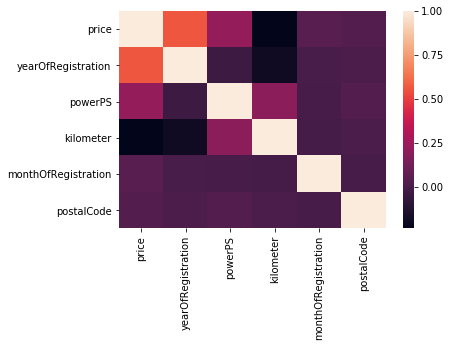

In [7]:
#карта корреляций между признаками и числовые значения признаков
c = df.corr()
sns.heatmap(c,
            xticklabels=c.columns.values,
            yticklabels=c.columns.values)
c

In [11]:
# определение коэффициента корреляции Спирмана
stats.spearmanr(df.price,df.vehicleType)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.011823536161095287, pvalue=0.005857972995050995)

In [12]:
#вычисление коэффициента распределения Пирсона
# создание словарей для численного представления
arr = {'bus':1, 'kleinwagen':2, 'suv':3, 'kombi':4, 'cabrio':5, 'limousine':6, 'coupe':7, 'andere':8}
df['intvehicleType'] = df['vehicleType']
for i in range(len(df['vehicleType'])):
    df['intvehicleType'].values[i] = arr[df['vehicleType'].values[i]]
#вычисление коэффициента распределения Пирсона
stats.pearsonr(df.price,df.intvehicleType)

(-0.011459010146193849, 0.0075701378253855145)

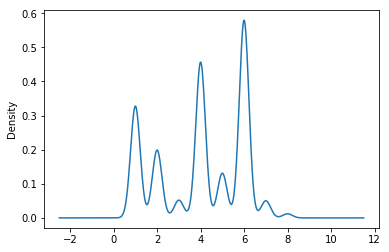

In [13]:
#плотность распределения типов кузова
s = pd.Series(df.intvehicleType)
s.plot(kind = "kde")

In [8]:
df['sum'] = df.powerPS + df.yearOfRegistration
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,sum
0,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,67112,2113
1,Mazda_3_1.6_Sport,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,96224,2109
2,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,57290,2145
3,Ford_C_MAX_2.0_TDCi_DPF_Titanium,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein,88361,2143
4,Mercedes_Benz_A_160_Classic_Klima,1850,test,bus,2004,manuell,102,a_klasse,150000,1,benzin,mercedes_benz,nein,49565,2106


In [10]:
df['len'] = df['name'].apply(len)
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,sum,len
0,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,67112,2113,27
1,Mazda_3_1.6_Sport,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,96224,2109,17
2,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,57290,2145,45
3,Ford_C_MAX_2.0_TDCi_DPF_Titanium,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein,88361,2143,32
4,Mercedes_Benz_A_160_Classic_Klima,1850,test,bus,2004,manuell,102,a_klasse,150000,1,benzin,mercedes_benz,nein,49565,2106,33
